### EDA2 Imager PART B: Gridding and Imaging 
- Start Date: 06/10/2022
- End Date: 25/10/2022

**Test data used:**
- EDA2 Data 2: 20200209

**Part 1 of the code:** imager_GalacticPlane
- Calculation of uvw coordinates
- Creation of one uniform df, with all values of real, imaginary visibilities, corresponding to every baseline

**Tasks performed:**
- Step 1: Initialise a dataframe for gridding: **df_uv_grid**
- Step 2: Populate the uv grid dataframe with corresponding visibility values, from : **df_uvw**

**Inputs (temporary):**
- Excel : Dataframe with antenna positions, uvw coordinates, real and imaginary visibilities
- **df_uvw_EDA2_20200209.xlsx**

**Output (temporary):**
- Image of size: (180 x 180)


**References:**
- ANITA Lectures on Imaging, link: https://www.youtube.com/watch?v=mRUZ9eckHZg&t=2315s

### Importing required libraies

In [1]:
# In order to save to .fits file for comparsion 
import astropy.io.fits as pyfits

# Importing fits library for viewing the images 
from astropy.io import fits

# For plotting
import matplotlib.pyplot as plt

# For plotting 3D plots
from mpl_toolkits.mplot3d import Axes3D

# Using Pandas
import pandas as pd

# In order to use numpy
import numpy as np

# For performing math calculations 
import math
from math import sin as sin
from math import cos as cos
from math import pi as pi 
from math import sqrt as sqrt 

# To check the system details 
import sys

# To check the version of astropy 
import astropy.version

import time

from scipy.fft import fft, ifft

In [2]:
# Defining start time
start = time.process_time()

### Printing versions: 

In [3]:
print('Versions Running on:')
print(f'\tPython\t\t{sys.version[:31]})')
print(f'\tAstropy\t\t{astropy.__version__}')
print(f'\tMatplotlib\t{plt.matplotlib.__version__}')

Versions Running on:
	Python		3.7.3 (default, Apr 24 2019, 15)
	Astropy		3.2.1
	Matplotlib	3.1.0


In [4]:
# Defining and calculating all the constants

# speed of light : 3 x 10^8 m/s
c = 299792458.0 
print('Speed of light(m/s):', c)

# operating frequency = 159.375 MHz
frequency = 159.375*(10**6)
print('Operating frequency in (MHz):', frequency)

# Calculating wavelength 
wavelength = c/frequency
print('Calculated wavelength in (m):', wavelength)

Speed of light(m/s): 299792458.0
Operating frequency in (MHz): 159375000.0
Calculated wavelength in (m): 1.881050716862745


### Reading in the required inputs

In [5]:
# Reading the values of real and imaginary visibilities 
vis_real = fits.open("chan_204_20200209T034646_vis_real.fits")
vis_imag = fits.open("chan_204_20200209T034646_vis_imag.fits")

vis_real_image = vis_real[0].data 
vis_imag_image = vis_imag[0].data 

# Creating a dataframe for all the real and imaginary visibilities 
df_vis_real = pd.DataFrame(vis_real_image)
df_vis_imag = pd.DataFrame(vis_imag_image)

In [6]:
df_vis_real.shape

(256, 256)

In [7]:
df_vis_imag.shape

(256, 256)

In [8]:
# Viewing the first five rows of the real visibilities 
df_vis_real.head()

0            1            2            3            4          5    \
0  328.867615    24.588898    21.415720    25.159893    23.272156  32.623756   
1   24.588898  1001.324097    32.625900    30.562368    42.107533  67.392723   
2   21.415720    32.625900  1802.112183  -221.844772     5.765813  75.233185   
3   25.159893    30.562368  -221.844772  1310.901611   119.502617  68.835815   
4   23.272156    42.107533     5.765813   119.502617  1286.565674  65.288414   

          6          7          8          9    ...        246         247  \
0   67.544327  25.600283  -5.008373  56.130409  ...  20.584955   23.733694   
1   49.459095  42.223946  30.334806  45.333996  ...  21.941923   34.037449   
2   28.925854  83.027077  53.337502  41.076969  ... -11.819213  103.449448   
3   46.054825  41.802647  53.148262  54.665218  ...  96.976486   -2.359920   
4  111.641373  72.028549 -37.939823  20.661905  ...  54.904049   21.105185   

         248         249        250        251        252  253         254  \
0  25.835600   21.793711  22.231745  17.629080  12.726423  0.0   32.011589   
1  69.689140   58.551960  49.599106  64.068863  42.769550  0.0   63.610893   
2  56.257942  100.279205  58.589966  71.161095 -25.184362  0.0  100.275230   
3  38.590828   38.563461  54.418682  48.846432  41.607552  0.0   20.950336   
4  40.463306   48.886780  55.891804  51.915932  58.621078  0.0   31.471109   

   255  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows x 256 columns]

In [9]:
# Viewing the first five rows of the imag visibilities 
df_vis_imag.head()

0          1           2           3          4          5    \
0   0.000000  20.347363    5.232766   17.098120  13.575706  40.088928   
1 -20.347363   0.000000  -49.239357   23.557892 -10.475840  -7.355006   
2  -5.232766  49.239357    0.000000 -158.680908 -65.660355   7.385582   
3 -17.098120 -23.557892  158.680908    0.000000 -37.410690  -3.263887   
4 -13.575706  10.475840   65.660355   37.410690   0.000000  42.297253   

         6          7          8          9    ...        246        247  \
0  -4.494764  36.376900   4.382819  -5.101678  ...   8.985415   0.704096   
1 -58.698902  19.284822  27.034655   8.961044  ... -23.801003 -31.874340   
2 -44.348717  24.389639  97.863960  54.119991  ... -25.575441  73.233078   
3 -64.458542  -7.080525  10.403498  25.782703  ... -18.212944  -3.222548   
4 -14.743159  37.618340  86.671875  59.724304  ...   5.650125  19.793768   

         248        249        250        251        252  253        254  255  
0   5.380109  16.447519  11.223100  13.179231   5.354980  0.0  17.303267  0.0  
1 -15.966197 -20.245653   1.901799 -21.248463 -23.853127  0.0 -34.438774  0.0  
2  62.957054   7.752845 -16.787003 -19.817877 -15.419326  0.0  60.391262  0.0  
3 -53.895336  16.432007  -0.216329  29.501335 -70.752960  0.0  -9.924271  0.0  
4  14.020086  37.388325  25.409815  35.181412 -10.839559  0.0  24.132935  0.0  

[5 rows x 256 columns]

In [10]:
# Read Excel file, which was generated from the previous steps 
df_uvw = pd.read_excel('df_uvw_EDA2_20200209.xlsx')

In [11]:
df_uvw[["Antenna_1","Antenna_2","X_lambda","Y_lambda","Z_lambda","u","v","w","vis_real","vis_imag"]]

Antenna_1  Antenna_2  X_lambda  Y_lambda  Z_lambda         u         v  \
0              0          1  3.576193  2.780893 -0.022328  3.576193  2.780893   
1              0          2 -0.195104  1.943063 -0.013290 -0.195104  1.943063   
2              0          3  0.587969  2.073309 -0.006911  0.587969  2.073309   
3              0          4  3.615001  0.913851 -0.008506  3.615001  0.913851   
4              0          5  2.433215 -2.140825  0.005848  2.433215 -2.140825   
...          ...        ...       ...       ...       ...       ...       ...   
65275        255        250 -1.115334  1.952632  0.007443 -1.115334  1.952632   
65276        255        251 -0.027644  1.032402  0.002126 -0.027644  1.032402   
65277        255        252  1.314159 -0.979772  0.011696  1.314159 -0.979772   
65278        255        253 -0.611892 -1.671938  0.024454 -0.611892 -1.671938   
65279        255        254 -0.687382 -0.392334  0.008506 -0.687382 -0.392334   

              w   vis_real   vis_imag  
0     -0.022328  24.588898  20.347363  
1     -0.013290  21.415720   5.232766  
2     -0.006911  25.159893  17.098120  
3     -0.008506  23.272156  13.575706  
4      0.005848  32.623756  40.088928  
...         ...        ...        ...  
65275  0.007443   0.000000   0.000000  
65276  0.002126   0.000000   0.000000  
65277  0.011696   0.000000   0.000000  
65278  0.024454   0.000000   0.000000  
65279  0.008506   0.000000   0.000000  

[65280 rows x 10 columns]

Notes: 
- Conjugate values have been included. 
- (Code has been written in EDA2 Imager Part A to include the conjugate values. The execution took almost 10-20 minutes.)

In [12]:
# Defining numpy arrays for u, v and w coordinates 
u_python = np.zeros((256, 256), dtype=float)
v_python = np.zeros((256, 256), dtype=float)
w_python = np.zeros((256, 256), dtype=float)

In [13]:
# Generating u, v and w coordinates for comparison with C++ imager 
# Iterate through all the rows of df_uvw
for index,row in df_uvw.iterrows():
    u = row['u_m']
    v = row['v_m']
    w = row['z_m']
     
    u_index = int(row['Antenna_1'])
    v_index = int(row['Antenna_2'])
      
    # Assigning the u,v and w coordinates 
    u_python[u_index, v_index] = u
    v_python[u_index, v_index] = v 
    w_python[u_index, v_index] = w    

In [14]:
# # Converting to .fits files
# hdu = pyfits.PrimaryHDU()
# hdu.data = u_python 
# # Copying into .fits files
# hdulist = pyfits.HDUList([hdu])
# hdulist.writeto('u_python.fits',clobber=True)

# hdu = pyfits.PrimaryHDU()
# hdu.data = v_python 
# # Copying into .fits files
# hdulist = pyfits.HDUList([hdu])
# hdulist.writeto('v_python.fits',clobber=True)

# hdu = pyfits.PrimaryHDU()
# hdu.data = w_python 
# # Copying into .fits files
# hdulist = pyfits.HDUList([hdu])
# hdulist.writeto('w_python.fits',clobber=True)

In [15]:
# Reading the values of real and imaginary visibilities (Marcin's u.fits and v.fits)
u = fits.open("u_python.fits")
v = fits.open("v_python.fits")

u_image = u[0].data 
v_image = v[0].data 

# Creating a dataframe for all u, v .fits files 
df_u = pd.DataFrame(u_image)
df_v = pd.DataFrame(v_image)


# These visibilities are in meters! Need to divide them by wavelengths 

In [16]:
df_u

0       1      2      3       4       5       6       7      8    \
0    0.000   6.727 -0.367  1.106   6.800   4.577   5.514   4.665  2.137   
1   -6.727   0.000 -7.094 -5.621   0.073  -2.150  -1.213  -2.062 -4.590   
2    0.367   7.094  0.000  1.473   7.167   4.944   5.881   5.032  2.504   
3   -1.106   5.621 -1.473  0.000   5.694   3.471   4.408   3.559  1.031   
4   -6.800  -0.073 -7.167 -5.694   0.000  -2.223  -1.286  -2.135 -4.663   
..     ...     ...    ...    ...     ...     ...     ...     ...    ...   
251  6.223  12.950  5.856  7.329  13.023  10.800  11.737  10.888  8.360   
252  3.699  10.426  3.332  4.805  10.499   8.276   9.213   8.364  5.836   
253  7.322  14.049  6.955  8.428  14.122  11.899  12.836  11.987  9.459   
254  7.464  14.191  7.097  8.570  14.264  12.041  12.978  12.129  9.601   
255  6.171  12.898  5.804  7.277  12.971  10.748  11.685  10.836  8.308   

       9    ...     246     247     248     249     250     251     252  \
0    2.173  ...  -4.203  -5.070  -7.659  -8.616  -8.269  -6.223  -3.699   
1   -4.554  ... -10.930 -11.797 -14.386 -15.343 -14.996 -12.950 -10.426   
2    2.540  ...  -3.836  -4.703  -7.292  -8.249  -7.902  -5.856  -3.332   
3    1.067  ...  -5.309  -6.176  -8.765  -9.722  -9.375  -7.329  -4.805   
4   -4.627  ... -11.003 -11.870 -14.459 -15.416 -15.069 -13.023 -10.499   
..     ...  ...     ...     ...     ...     ...     ...     ...     ...   
251  8.396  ...   2.020   1.153  -1.436  -2.393  -2.046   0.000   2.524   
252  5.872  ...  -0.504  -1.371  -3.960  -4.917  -4.570  -2.524   0.000   
253  9.495  ...   3.119   2.252  -0.337  -1.294  -0.947   1.099   3.623   
254  9.637  ...   3.261   2.394  -0.195  -1.152  -0.805   1.241   3.765   
255  8.344  ...   1.968   1.101  -1.488  -2.445  -2.098  -0.052   2.472   

        253     254     255  
0    -7.322  -7.464  -6.171  
1   -14.049 -14.191 -12.898  
2    -6.955  -7.097  -5.804  
3    -8.428  -8.570  -7.277  
4   -14.122 -14.264 -12.971  
..      ...     ...     ...  
251  -1.099  -1.241   0.052  
252  -3.623  -3.765  -2.472  
253   0.000  -0.142   1.151  
254   0.142   0.000   1.293  
255  -1.151  -1.293   0.000  

[256 rows x 256 columns]

In [17]:
df_v

0      1      2      3      4       5      6      7      8      9    \
0    0.000  5.231  3.655  3.900  1.719  -4.027 -1.129  0.726  1.693 -0.977   
1   -5.231  0.000 -1.576 -1.331 -3.512  -9.258 -6.360 -4.505 -3.538 -6.208   
2   -3.655  1.576  0.000  0.245 -1.936  -7.682 -4.784 -2.929 -1.962 -4.632   
3   -3.900  1.331 -0.245  0.000 -2.181  -7.927 -5.029 -3.174 -2.207 -4.877   
4   -1.719  3.512  1.936  2.181  0.000  -5.746 -2.848 -0.993 -0.026 -2.696   
..     ...    ...    ...    ...    ...     ...    ...    ...    ...    ...   
251 -6.820 -1.589 -3.165 -2.920 -5.101 -10.847 -7.949 -6.094 -5.127 -7.797   
252 -3.035  2.196  0.620  0.865 -1.316  -7.062 -4.164 -2.309 -1.342 -4.012   
253 -1.733  3.498  1.922  2.167 -0.014  -5.760 -2.862 -1.007 -0.040 -2.710   
254 -4.140  1.091 -0.485 -0.240 -2.421  -8.167 -5.269 -3.414 -2.447 -5.117   
255 -4.878  0.353 -1.223 -0.978 -3.159  -8.905 -6.007 -4.152 -3.185 -5.855   

     ...    246    247    248    249    250    251    252    253    254    255  
0    ...  5.754  3.951  5.618  6.812  8.551  6.820  3.035  1.733  4.140  4.878  
1    ...  0.523 -1.280  0.387  1.581  3.320  1.589 -2.196 -3.498 -1.091 -0.353  
2    ...  2.099  0.296  1.963  3.157  4.896  3.165 -0.620 -1.922  0.485  1.223  
3    ...  1.854  0.051  1.718  2.912  4.651  2.920 -0.865 -2.167  0.240  0.978  
4    ...  4.035  2.232  3.899  5.093  6.832  5.101  1.316  0.014  2.421  3.159  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
251  ... -1.066 -2.869 -1.202 -0.008  1.731  0.000 -3.785 -5.087 -2.680 -1.942  
252  ...  2.719  0.916  2.583  3.777  5.516  3.785  0.000 -1.302  1.105  1.843  
253  ...  4.021  2.218  3.885  5.079  6.818  5.087  1.302  0.000  2.407  3.145  
254  ...  1.614 -0.189  1.478  2.672  4.411  2.680 -1.105 -2.407  0.000  0.738  
255  ...  0.876 -0.927  0.740  1.934  3.673  1.942 -1.843 -3.145 -0.738  0.000  

[256 rows x 256 columns]

### Gridding 

**Theory:**
- Visibilities need to be "gridded" on a regularly spaced grid, in-order to perform a fourier transform on them. 

**Steps involved:**

**Step 1 :** 
- Initialise two 2D grids, one for each real and imaginary visibilities with 0 values to begin with. 
- The grid cell size depends on: 
    -  **(Nx, Ny)**           : Image size 
    -  **(delta_x, delta_y)** : pixel size of the image, which you get from the Full Width Half Max(FWHM) 
    - **delta_x** = 1/3 x angular resolution(theta_degrees)
    - **delta_y** = 1/3 x angular resolution(theta_degrees)
        - **lambda/D** : angular resolution 
            - **lambda** : which you get from operating frequency
            - **D**      : Maximum baseline length 
    - **delta_u** : **1/(Nx*(delta_x))** : Dependent on Nx and delta_x
    - **delta_v** : **1/(Ny*(delta_y))** : Dependent on Ny and delta_y
    - If **Nx = Ny** and **delta_x = delta_y**, then: 
        - **delta_u = delta_v**
        
**Step 2 :**
- Populate the grid with visibility values, based on u and v coordinates
- Think about, how you are going to handle the weighting aspect, to start with keep it natural weighting! 
       
**References:**
- Fundamentals of Radio Astronomy, Pg 266 onwards
- ANITA Lectures on Imaging and Deconvolution

### Visualising gridded visibilities:

In [18]:
# Viewing the first five rows of the 
df_uvw

Antenna_1  Antenna_2  X_lambda  Y_lambda  Z_lambda         u         v  \
0              0          1  3.576193  2.780893 -0.022328  3.576193  2.780893   
1              0          2 -0.195104  1.943063 -0.013290 -0.195104  1.943063   
2              0          3  0.587969  2.073309 -0.006911  0.587969  2.073309   
3              0          4  3.615001  0.913851 -0.008506  3.615001  0.913851   
4              0          5  2.433215 -2.140825  0.005848  2.433215 -2.140825   
...          ...        ...       ...       ...       ...       ...       ...   
65275        255        250 -1.115334  1.952632  0.007443 -1.115334  1.952632   
65276        255        251 -0.027644  1.032402  0.002126 -0.027644  1.032402   
65277        255        252  1.314159 -0.979772  0.011696  1.314159 -0.979772   
65278        255        253 -0.611892 -1.671938  0.024454 -0.611892 -1.671938   
65279        255        254 -0.687382 -0.392334  0.008506 -0.687382 -0.392334   

              w    u_m    v_m    z_m   vis_real   vis_imag  
0     -0.022328  6.727  5.231 -0.042  24.588898  20.347363  
1     -0.013290 -0.367  3.655 -0.025  21.415720   5.232766  
2     -0.006911  1.106  3.900 -0.013  25.159893  17.098120  
3     -0.008506  6.800  1.719 -0.016  23.272156  13.575706  
4      0.005848  4.577 -4.027  0.011  32.623756  40.088928  
...         ...    ...    ...    ...        ...        ...  
65275  0.007443 -2.098  3.673  0.014   0.000000   0.000000  
65276  0.002126 -0.052  1.942  0.004   0.000000   0.000000  
65277  0.011696  2.472 -1.843  0.022   0.000000   0.000000  
65278  0.024454 -1.151 -3.145  0.046   0.000000   0.000000  
65279  0.008506 -1.293 -0.738  0.016   0.000000   0.000000  

[65280 rows x 13 columns]

In [19]:
# Here, u v and w are in wavelengths 
u_list = df_uvw["u"].values.tolist()
v_list = df_uvw["v"].values.tolist()
w_list = df_uvw["w"].values.tolist()

In [20]:
print('min(u_list) and max(u_list) :', round(min(u_list),2),',', round(max(u_list),2))
print('min(v_list) and max(v_list) :', round(min(v_list),2),',', round(max(v_list),2))
print('min(w_list) and max(w_list) :', round(min(w_list),2),',', round(max(w_list),2))

min(u_list) and max(u_list) : -18.53 , 18.53
min(v_list) and max(v_list) : -18.58 , 18.58
min(w_list) and max(w_list) : -0.11 , 0.11


In [21]:
df_uvw.shape

(65280, 13)

In [22]:
df_uvw.count()

Antenna_1    65280
Antenna_2    65280
X_lambda     65280
Y_lambda     65280
Z_lambda     65280
u            65280
v            65280
w            65280
u_m          65280
v_m          65280
z_m          65280
vis_real     65280
vis_imag     65280
dtype: int64

In [23]:
df_uvw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65280 entries, 0 to 65279
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Antenna_1  65280 non-null  int64  
 1   Antenna_2  65280 non-null  int64  
 2   X_lambda   65280 non-null  float64
 3   Y_lambda   65280 non-null  float64
 4   Z_lambda   65280 non-null  float64
 5   u          65280 non-null  float64
 6   v          65280 non-null  float64
 7   w          65280 non-null  float64
 8   u_m        65280 non-null  float64
 9   v_m        65280 non-null  float64
 10  z_m        65280 non-null  float64
 11  vis_real   65280 non-null  float64
 12  vis_imag   65280 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 6.5 MB


In [24]:
# Defining maximum baseline in meters, based on EDA2
# Can calculate this value later based on x and y coordinates
max_baseline = 35 
print('Maximum baseline (m):', max_baseline)

# Calculating maximum angular resolution in radians
theta_radians = wavelength/max_baseline
print('theta_radians:', round(theta_radians, 4))

# Calculating delta_x : angular width 
delta_x = (1/3)*(theta_radians)
print('delta_x:', round(delta_x,4))

# Calculating delta_y : angular height 
delta_y = (1/3)*(theta_radians)
print('delta_y:', round(delta_y,4))

# Assigning Nx 
Nx = 180 
print('Nx:', Nx)

# Assigning Ny
Ny = 180 
print('Ny:', Nx)

# Source: Taken from Marcin's C++ code for gridding()
# Calculating centre positions of the grid 
centre_x = int(Nx/2)
centre_y = int(Ny/2)

# For images, with even dimensions, default values = 0 
is_odd_x = 0 
is_odd_y = 0

# For images, with odd dimensions, setting values to 1 
if(Nx%2 ==1):
    is_odd_x = 1
if(Ny%2 ==1):
    is_odd_y = 1
    
# Printing out the values
print("centre_x =", centre_x)
print("centre_x =", centre_x)
print("is_odd_x =", is_odd_x)
print("is_odd_y =", is_odd_y)

# Calculating delta_u 
delta_u = 1/(Nx*(delta_x))
print('delta_u:', round(delta_u,2))

# Calculate delta_v
delta_v = 1/(Ny*(delta_y))
print('delta_v:', round(delta_v, 2))

# u_max, u_min values  
u_max = round(max(u_list),2)
u_min = round(min(u_list),2)
print("u(min, max):", u_min,",", u_max)

# v_max, v_min values 
v_max = round(max(v_list),2)
v_min = round(min(v_list),2)
print("v(min, max):", v_min,",", v_max)

Maximum baseline (m): 35
theta_radians: 0.0537
delta_x: 0.0179
delta_y: 0.0179
Nx: 180
Ny: 180
centre_x = 90
centre_x = 90
is_odd_x = 0
is_odd_y = 0
delta_u: 0.31
delta_v: 0.31
u(min, max): -18.53 , 18.53
v(min, max): -18.58 , 18.58


### Gridding:

In [25]:
# Initialising an uv_grid_counter, to count the number of visibilities stored in every grid 
uv_grid_counter = np.zeros((Nx, Ny), dtype=int)

# Initialising an uv_grids for real and imaginary visibilities, as per the image size 
uv_grid_real = np.zeros((Nx, Ny), dtype=float)
uv_grid_imag = np.zeros((Nx, Ny), dtype=float)
uv_grid = np.zeros((Nx, Ny), dtype=complex)

In [26]:
# def incremental_range(start, stop, step, inc):
#     value = start
#     while value < stop:
#         return_value = round(value,1)
#         yield return_value
#         value = value + step
#         step = step + inc

In [27]:
# antenna_list = list(incremental_range(0,256,1,0))

In [28]:
# for i in antenna_list:
#     print(i)

In [29]:
# len(antenna_list)

In [30]:
count = 0
grid_count = 0

# Defining start time
start_gridding = time.process_time()

# Iterate through all the rows of df_uvw, total: 256x255 iterations: 65280 
for index,row in df_uvw.iterrows():
    
    count += 1
    
    # Get the u,v coordinates in wavelengths only 
    u = row['u']
    v = row['v']
    
    # Get the antenna numbers 
    a1 = row['Antenna_1']
    a2 = row['Antenna_2']
    
    vis_real = row['vis_real']
    vis_imag = row['vis_imag']
        
    # Fix your u and v coordinates
    u_pix = round(u/delta_u)
    v_pix = round(v/delta_v)
    
    # Calculating u_index, v_index for positive values, 
    u_index = int(u_pix + Nx/2)
    v_index = int(v_pix + Ny/2)
    
    # Setting initial values of x_grid, y_grid 
    u_grid = 0
    v_grid = 0 
    
    # Doing an FFT-UNSHIFT, moving from centre to corners 
    # u_index < centre_x, the index is pushed away further towards the corners, in the right half of the grid 
    # u_index > center_x, the index is pushed away further towards the corners, in the left half of the grid 
    
    if(u_index < centre_x):
        u_grid = u_index + centre_x 
    else: 
        u_grid = u_index - centre_x 
    
    if(v_index < centre_y):
        v_grid = v_index + centre_y 
    else: 
        v_grid = v_index - centre_x 
      
    # Populate the uv grid, with Non NaN visibilities  
    # If grid is empty, assign the visibility, else assign by adding it with the existing value 
    if (math.isnan(vis_real)==False) and (math.isnan(vis_imag)==False): 
        
        # Assigning real visibility 
        uv_grid_real[u_grid, v_grid] += vis_real
        
        # Assigning imag visibility 
        uv_grid_imag[u_grid, v_grid] += vis_imag
        
        uv_grid[u_grid,v_grid] += vis_real + 1j*vis_imag
        
        # Incrementing the value in uv_grid_counter 
        uv_grid_counter[u_grid, v_grid] += 1 
        
        grid_count += 1
        
        print("Baseline",count,"[ grid_count:", grid_count,"A1:", a1,"A2:",a2,"u:",round(u,2),"v:",round(v,2),"real:",round(vis_real,2),"imag:",round(vis_imag,2),"u_index:",u_grid,"v_index:", v_grid)

          
# Overall time taken in seconds                    
print("gridding A took:",time.process_time() - start_gridding)

Baseline 1 [ grid_count: 1 A1: 0.0 A2: 1.0 u: 3.58 v: 2.78 real: 24.59 imag: 20.35 u_index: 12 v_index: 9
Baseline 2 [ grid_count: 2 A1: 0.0 A2: 2.0 u: -0.2 v: 1.94 real: 21.42 imag: 5.23 u_index: 179 v_index: 6
Baseline 3 [ grid_count: 3 A1: 0.0 A2: 3.0 u: 0.59 v: 2.07 real: 25.16 imag: 17.1 u_index: 2 v_index: 7
Baseline 4 [ grid_count: 4 A1: 0.0 A2: 4.0 u: 3.62 v: 0.91 real: 23.27 imag: 13.58 u_index: 12 v_index: 3
Baseline 5 [ grid_count: 5 A1: 0.0 A2: 5.0 u: 2.43 v: -2.14 real: 32.62 imag: 40.09 u_index: 8 v_index: 173
Baseline 6 [ grid_count: 6 A1: 0.0 A2: 6.0 u: 2.93 v: -0.6 real: 67.54 imag: -4.49 u_index: 9 v_index: 178
Baseline 7 [ grid_count: 7 A1: 0.0 A2: 7.0 u: 2.48 v: 0.39 real: 25.6 imag: 36.38 u_index: 8 v_index: 1
Baseline 8 [ grid_count: 8 A1: 0.0 A2: 8.0 u: 1.14 v: 0.9 real: -5.01 imag: 4.38 u_index: 4 v_index: 3
Baseline 9 [ grid_count: 9 A1: 0.0 A2: 9.0 u: 1.16 v: -0.52 real: 56.13 imag: -5.1 u_index: 4 v_index: 178
Baseline 10 [ grid_count: 10 A1: 0.0 A2: 10.0 u: 

In [31]:
# To check the number of visibilities getting gridded:
uv_grid_counter.sum()

65280

In [32]:
hdu = pyfits.PrimaryHDU()
hdu.data = uv_grid_counter
# Copying into .fits files
hdulist = pyfits.HDUList([hdu])
hdulist.writeto('uv_grid_counter_python.fits',overwrite=True)

In [33]:
hdu = pyfits.PrimaryHDU()
hdu.data = uv_grid_real
# Copying into .fits files
hdulist = pyfits.HDUList([hdu])
hdulist.writeto('uv_grid_real_python.fits',overwrite=True)

In [34]:
hdu = pyfits.PrimaryHDU()
hdu.data = uv_grid_imag
# Copying into .fits files
hdulist = pyfits.HDUList([hdu])
hdulist.writeto('uv_grid_imag_python.fits',overwrite=True)

In [35]:
# hdu = pyfits.PrimaryHDU()
# hdu.data = uv_grid
# # Copying into .fits files
# hdulist = pyfits.HDUList([hdu])
# hdulist.writeto('uv_grid_python.fits',overwrite=True)

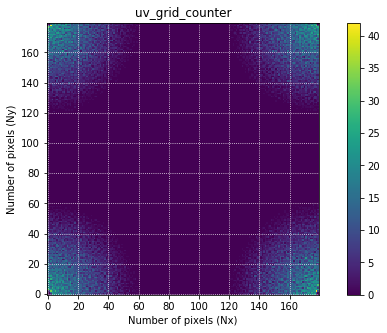

In [36]:
# create figure
fig = plt.figure(figsize=(10,5))
plt.imshow(uv_grid_counter, origin ='lower')
plt.grid(color='white', ls='dotted')
plt.xlabel("Number of pixels (Nx)")
plt.ylabel("Number of pixels (Ny)")
plt.title("uv_grid_counter")
plt.colorbar()

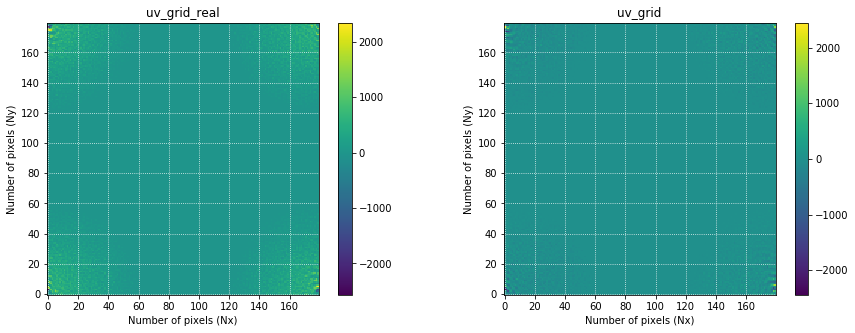

In [37]:
# create figure
fig = plt.figure(figsize=(15, 5))

# setting values to rows and column variables
rows = 1
columns = 2

# create figure
fig.add_subplot(rows, columns, 1)
plt.imshow(uv_grid_real, origin ='lower')
plt.grid(color='white', ls='dotted')
plt.xlabel("Number of pixels (Nx)")
plt.ylabel("Number of pixels (Ny)")
plt.title("uv_grid_real")
plt.colorbar()

# create figure
fig.add_subplot(rows, columns, 2)
plt.imshow(uv_grid_imag, origin ='lower')
plt.grid(color='white', ls='dotted')
plt.xlabel("Number of pixels (Nx)")
plt.ylabel("Number of pixels (Ny)")
plt.title("uv_grid")
plt.colorbar()

In [38]:
hdu = pyfits.PrimaryHDU()
hdu.data = uv_grid_real 
# Copying into .fits files
hdulist = pyfits.HDUList([hdu])
hdulist.writeto('uv_grid_real_python.fits',overwrite=True)

In [39]:
hdu = pyfits.PrimaryHDU()
hdu.data = uv_grid_imag 
# Copying into .fits files
hdulist = pyfits.HDUList([hdu])
hdulist.writeto('uv_grid_imag_python.fits',overwrite=True)

### dirty_image (after FFT-SHIFT)
- dirty_image_real 
- dirty_image_imag
- dirty_image 

In [40]:
# uv_grid, with complex data-type? 
dirty_image = np.fft.ifftshift(np.fft.ifft2(uv_grid))

In [41]:
dirty_image.shape

(180, 180)

In [42]:
# Ref: https://stackoverflow.com/questions/55765443/shortcut-to-split-complex-array-into-real-and-imaginary-arrays

# Transfer all the real/imag parts of this complex 2D Array into two 2D Arrays 
dirty_image_real = dirty_image.real
dirty_image_imag = dirty_image.imag

In [43]:
print(dirty_image_real.shape, dirty_image_imag.shape)

(180, 180) (180, 180)


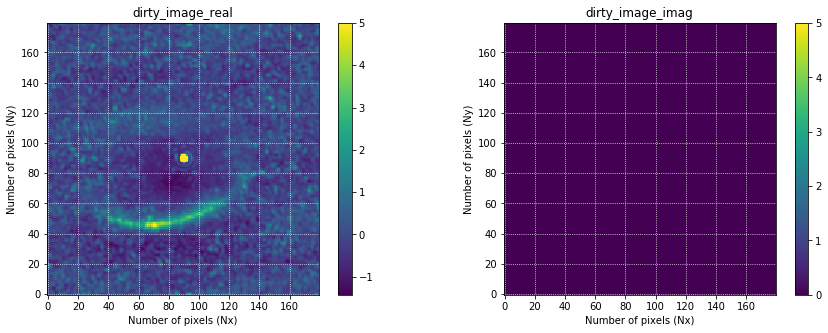

In [44]:
# create figure
fig = plt.figure(figsize=(15, 5))

# setting values to rows and column variables
rows = 1
columns = 2

# create figure
fig.add_subplot(rows, columns, 1)
plt.imshow(dirty_image_real, origin ='lower', vmax=5)
plt.grid(color='white', ls='dotted')
plt.xlabel("Number of pixels (Nx)")
plt.ylabel("Number of pixels (Ny)")
plt.title("dirty_image_real")
plt.colorbar()

# create figure
fig.add_subplot(rows, columns, 2)
plt.imshow(dirty_image_imag, origin ='lower', vmax=5)
plt.grid(color='white', ls='dotted')
plt.xlabel("Number of pixels (Nx)")
plt.ylabel("Number of pixels (Ny)")
plt.title("dirty_image_imag")
plt.colorbar()

In [45]:
hdu = pyfits.PrimaryHDU()
hdu.data = dirty_image_real
# Copying into .fits files
hdulist = pyfits.HDUList([hdu])
hdulist.writeto('dirty_image_real_python.fits',overwrite=True)

In [46]:
hdu = pyfits.PrimaryHDU()
hdu.data = dirty_image_imag
# Copying into .fits files
hdulist = pyfits.HDUList([hdu])
hdulist.writeto('dirty_image_imag_python.fits',overwrite=True)

In [47]:
# Overall time taken in seconds                    
print(time.process_time() - start)

196.03125


In [48]:
# Extra code

In [49]:
# # Defining start time
# start_gridding = time.process_time()

# count = 0 
# grid_count = 0 

# # Outer loop, i for Antenna 1, i.e rows 
# for a1 in antenna_list:
    
#     # Inner loop, j for Antenna 2, i.e columns 
#     for a2 in antenna_list:
#         if(a1!=a2):            
#                 count += 1
                
#                 # Getting the u,v coordinates for a1,a2 
#                 u = df_u.iloc[a1][a2]
#                 v = df_u.iloc[a1][a2]
                
#                 if(math.isnan(u)==False) and (math.isnan(v)==False):
                                
#                     # Calculating the u,v coordinates in lambda/wavelengths 
#                     u_lambda = u/wavelength
#                     v_lambda = v/wavelength

#                     # Get the corresponding real and imag visibility value for that antenna pair
#                     vis_real = df_vis_real.iloc[a1][a2]
#                     vis_imag = df_vis_imag.iloc[a1][a2]

#                     # Fix your u and v coordinates
#                     u_pix = round(u_lambda/delta_u)
#                     v_pix = round(v_lambda/delta_v)

#                     u_index = int(u_pix + Nx/2)
#                     v_index = int(v_pix + Ny/2)

#                     u_grid = 0
#                     v_grid = 0 
#                     # Doing an FFT-UNSHIFT, moving from centre to corners 
#                     if(u_index < centre_x):
#                         u_grid = u_index + centre_x 
#                     else:
#                         u_grid = u_index - centre_x 

#                     if(v_index < centre_y):
#                         v_grid = v_index + centre_y 
#                     else: 
#                         v_grid = v_index - centre_x 
                    
#                     # Populate the uv grid
#                     if (math.isnan(vis_real)==False) and (math.isnan(vis_imag)==False): 
#                         uv_grid_real[u_grid, v_grid] += vis_real
#                         uv_grid_imag[u_grid, v_grid] += vis_imag
#                         uv_grid_counter[u_grid, v_grid] += 1
#                         grid_count += 1   
                    
# #                     # For conjugate values? 
# #                     u_index = int(-u_pix + Nx/2)
# #                     v_index = int(-v_pix + Ny/2)

# #                     u_grid = 0
# #                     v_grid = 0 
                    
# #                     # Doing an FFT-UNSHIFT, moving from centre to corners 
# #                     if(u_index < centre_x):
# #                         u_grid = u_index + centre_x 
# #                     else:
# #                         u_grid = u_index - centre_x 

# #                     if(v_index < centre_y):
# #                         v_grid = v_index + centre_y 
# #                     else: 
# #                         v_grid = v_index - centre_x 
                    
# #                     # Populate the uv grid
# #                     if (math.isnan(vis_real)==False) and (math.isnan(vis_imag)==False): 
# #                         uv_grid_real[u_grid, v_grid] += vis_real
# #                         uv_grid_imag[u_grid, v_grid] += vis_imag
# #                         uv_grid_counter[u_grid, v_grid] += 1
# #                         grid_count += 1                       
                        
#                     print("Baseline",count,"[ grid_count:", grid_count,"A1:", a1,"A2:",a2,"u:",round(u,2),"v:",round(v,2),"real:",round(vis_real,2),"imag:",round(vis_imag,2),"u_grid:",u_grid,"v_grid:", v_grid)
                    
# # Overall time taken in seconds                    
# print("gridding A took(s):",time.process_time() - start_gridding)